In [1]:
%%capture --no-stderr
%pip install -U langgraph langsmith

# Used for this tutorial; not a requirement for LangGraph
%pip install -U langchain_anthropic

In [1]:
import getpass
import os

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("ANTHROPIC_API_KEY")

ANTHROPIC_API_KEY:  ········


In [2]:
_set_env("LANGSMITH_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "LangGraph Tutorial"

LANGSMITH_API_KEY:  ········


In [4]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [13]:
from langchain_anthropic import ChatAnthropic

llm = ChatAnthropic(model='claude-3-haiku-20240307')

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

In [15]:
graph_builder.add_edge(START, "chatbot")

In [16]:
graph_builder.add_edge("chatbot", END)

In [17]:
graph = graph_builder.compile()

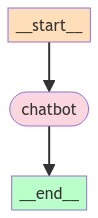

In [18]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [22]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ['quit', 'exit', 'q']:
        print("Goodbye")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value['messages'][-1].content)

User:  Why do Indians call random people aunty and uncle?


Assistant: There are a few reasons why Indians often refer to people as "aunty" and "uncle" even if they are not actually related:

1. Respect and etiquette - Using "aunty" and "uncle" is a way to show respect and deference to elders or older people, regardless of their relation to you. It's considered polite and respectful.

2. Kinship terms - In Indian cultures, the kinship system is more expansive than the nuclear family. Terms like "aunty" and "uncle" can refer to family friends, community elders, or even strangers who are of an older generation.

3. Familiarity and comfort - Using these terms helps create a sense of familiarity and comfort, even with people you don't know well. It's a way to acknowledge the other person and have a friendly interaction.

4. Cultural norms - Referring to elders as "aunty" or "uncle" is a very common cultural practice in India and among Indian communities. It's part of the social etiquette and expected behavior.

5. Lack of age-specific titles - Unli

User:  Are there other culture who also do that?


Assistant: Yes, there are a number of other cultures that have similar practices of venerating or honoring ancestors:

- In East Asian cultures like China, Japan, and Korea, ancestor veneration and honoring one's ancestors is an important part of cultural and religious traditions. This often involves offerings, rituals, and maintaining ancestral altars or shrines.

- In Latin American cultures, the Day of the Dead (Día de los Muertos) is a holiday where families gather to remember and honor their deceased loved ones, often visiting cemeteries and leaving offerings.

- In Hinduism and other South Asian religions, honoring one's ancestors through rituals and offerings is a significant practice.

- In some Indigenous cultures around the world, communicating with and honoring ancestors is an integral part of spirituality and cosmology.

- In many African cultures, ancestral veneration, rituals, and beliefs about the importance of the ancestors are deeply rooted.

So while the specific prac

User:  No, I meant call each other aunty and uncles in other cultures.


Assistant: Ah I see, you're referring to the practice in some cultures of addressing non-related older adults as "aunt" or "uncle" as a sign of respect and kinship, even though they are not actual family members.

This is quite common in many Asian and African cultures, as well as in some Hispanic and Indigenous communities. The terms "auntie" or "aunty" and "uncle" are used to show deference and create a sense of community, even for elders who are not biologically related.

It reflects the cultural value placed on respecting one's elders and creating a feeling of extended family beyond just blood relations. Calling an older adult "aunt" or "uncle" is a way to acknowledge their seniority and importance in the community, even if they are not literally your aunt or uncle.

This practice helps foster stronger social bonds and a sense of belonging, particularly in cultures that emphasize collectivism and interdependence over strict individualism. It's a way of creating a kinship network th

User:  q


Goodbye


In [30]:
for event in graph.stream({"messages": ("user", user_input)}):
    print(event['chatbot']['messages'])
    print()

[AIMessage(content='I don\'t have enough context to provide a meaningful response to just the letter "q". Could you please rephrase your question or provide more details about what you\'re looking for?', response_metadata={'id': 'msg_01PCdGqYrGXGSeBG3F51hF9U', 'model': 'claude-3-haiku-20240307', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'input_tokens': 8, 'output_tokens': 40}}, id='run-ed3b9dfd-7524-4a7d-8b29-26611aeb26c8-0', usage_metadata={'input_tokens': 8, 'output_tokens': 40, 'total_tokens': 48})]

